In [8]:
import sys
import os
from pathlib import Path
import pickle
import json
import sqlite3

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


from cbir import BASE_DIR
os.chdir(BASE_DIR)

In [9]:
# !ls -lah .cbir/databases/d-2/i-1/

In [10]:
# conn = sqlite3.connect('.cbir/databases/d-2/i-1/index.db')
# c = conn.cursor()
# cursor = c.execute("SELECT name FROM sqlite_master WHERE type='table';")
# print(cursor.fetchall())
# conn.close()

______

In [69]:
database = 'd-100k'
index = 'i-1'

In [70]:
with open(f'.cbir/databases/{database}/{index}/params.pkl', 'rb') as f:
    params = pickle.load(f)
K = params['K']
L = params['L']
N = K ** L
print(params)

{'des_type': 'HardNetAll', 'max_keypoints': 2000, 'K': 10, 'L': 4, 'n_words': 10000}


In [71]:
with open(f'.cbir/databases/{database}/{index}/data_dependent_params.pkl', 'rb') as f:
    data_dependent_params = pickle.load(f)
print(data_dependent_params.keys())
print('count_images:', data_dependent_params['count_images'])

dict_keys(['count_images', 'freqs', 'idf', 'most_frequent', 'least_frequent'])
count_images: 3


In [72]:
word_to_count_photos = [0] * N

In [73]:
conn = sqlite3.connect(f'.cbir/databases/{database}/{index}/index.db')
c = conn.cursor()
cursor = c.execute('select word, photos from word')
for row in cursor:
    word_to_count_photos[row[0]] = len(pickle.loads(row[1]))
conn.close()

In [74]:
print(len(list(filter(lambda x: x != 0, word_to_count_photos))))

743


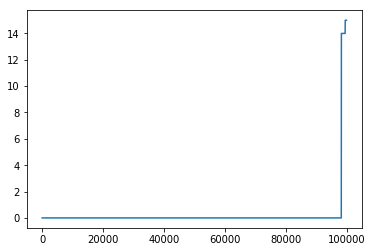

In [59]:
plt.plot(sorted(word_to_count_photos));

_____

In [53]:
conn = sqlite3.connect(f'.cbir/databases/{database}/{index}/index.db')
c = conn.cursor()
cursor = c.execute('select * from photobow limit 5')
for row in cursor:
    print(row)
conn.close()

('data/Buildings/Original/Oxford_sample/jpg/all_souls_000000.jpg', b'\x80\x03cscipy.sparse.coo\ncoo_matrix\nq\x00)\x81q\x01}q\x02(X\x06\x00\x00\x00_shapeq\x03K\x01M\x11\'\x86q\x04X\x08\x00\x00\x00maxprintq\x05K2X\x03\x00\x00\x00rowq\x06cnumpy.core.multiarray\n_reconstruct\nq\x07cnumpy\nndarray\nq\x08K\x00\x85q\tC\x01bq\n\x87q\x0bRq\x0c(K\x01M\xdb\x01\x85q\rcnumpy\ndtype\nq\x0eX\x02\x00\x00\x00i4q\x0fK\x00K\x01\x87q\x10Rq\x11(K\x03X\x01\x00\x00\x00<q\x12NNNJ\xff\xff\xff\xffJ\xff\xff\xff\xffK\x00tq\x13b\x89Bl\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00